# IMDb 2024 - Full Exploratory Data Analysis (EDA + Cleaning + Visuals)

In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
# Step 2: Load Dataset
csv_path = '../data/csv/cleaned_movies.csv'
df = pd.read_csv(csv_path)

In [3]:
# Step 3: Strip Whitespace and Format Text Columns
df['Genre'] = df['Genre'].astype(str).str.strip().str.title()
df['Movie_Name'] = df['Movie_Name'].astype(str).str.strip()

In [4]:
# Step 4: Convert Data Types
df['Voting_Counts'] = pd.to_numeric(df['Voting_Counts'], errors='coerce').fillna(0).astype(int)
df['Duration_Minutes'] = pd.to_numeric(df['Duration_Minutes'], errors='coerce').fillna(0).astype(int)

In [5]:
# Step 5: Remove Duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Step 6: Fill Missing Ratings
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [7]:
# Step 7: Forward and Backward Fill for Remaining Nulls
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [8]:
# Step 8: Drop Rows with Null Movie_Name or Genre
df.dropna(subset=['Movie_Name', 'Genre'], inplace=True)

In [9]:
# Step 9: Drop Fully Empty Rows
df.dropna(how='all', inplace=True)

In [10]:
# Step 10: Drop Unused Columns if Present
df.drop(columns=[col for col in ['Duration_Total', 'Duration_Category'] if col in df.columns], inplace=True)

In [11]:
# Step 11: Tag Ratings
def tag_rating(r):
    if r >= 8:
        return 'Hit'
    elif r >= 6:
        return 'Average'
    return 'Flop'

df['Rating_Tag'] = df['Rating'].apply(tag_rating)

In [12]:
# Step 11.1: Notebook Friendly Check
df.columns
df.isnull().sum()
df.head()

,Movie_Name,Rating,Voting_Counts,Genre,Duration_Minutes,Duration,Rating_Tag
0,Nosferatu,7.2,212000,Horror,132,2–3 hrs,Average
1,Heretic,7.0,164000,Horror,111,< 2 hrs,Average
2,The Substance,7.2,320000,Horror,141,2–3 hrs,Average
3,Please Don't Feed the Children,4.9,343,Horror,94,< 2 hrs,Flop
4,Presence,6.1,30000,Horror,84,< 2 hrs,Average


In [13]:
# Step 12: Correlation Matrix
correlation_matrix = df[['Rating', 'Voting_Counts', 'Duration_Minutes']].corr()

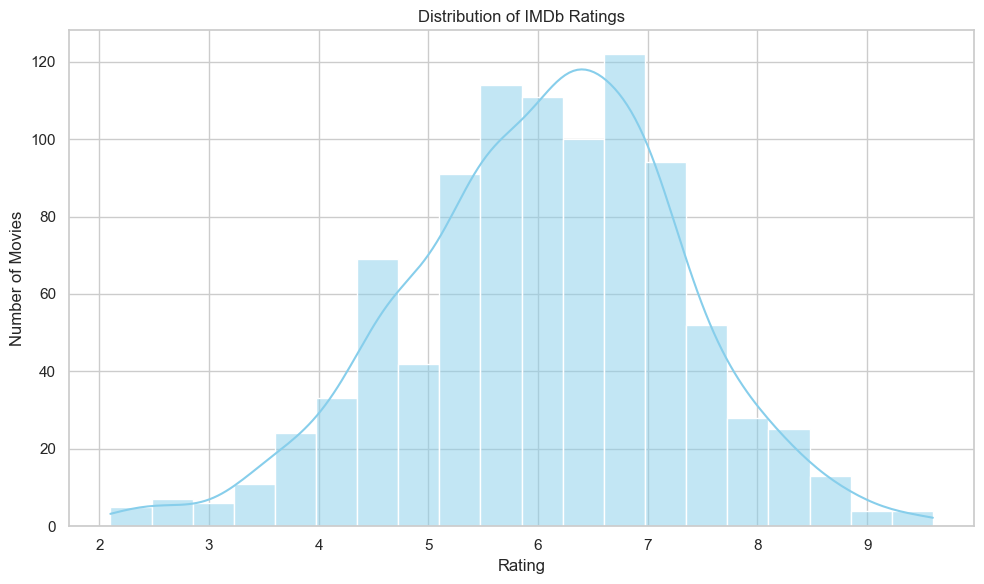

In [14]:
# Step 13: Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

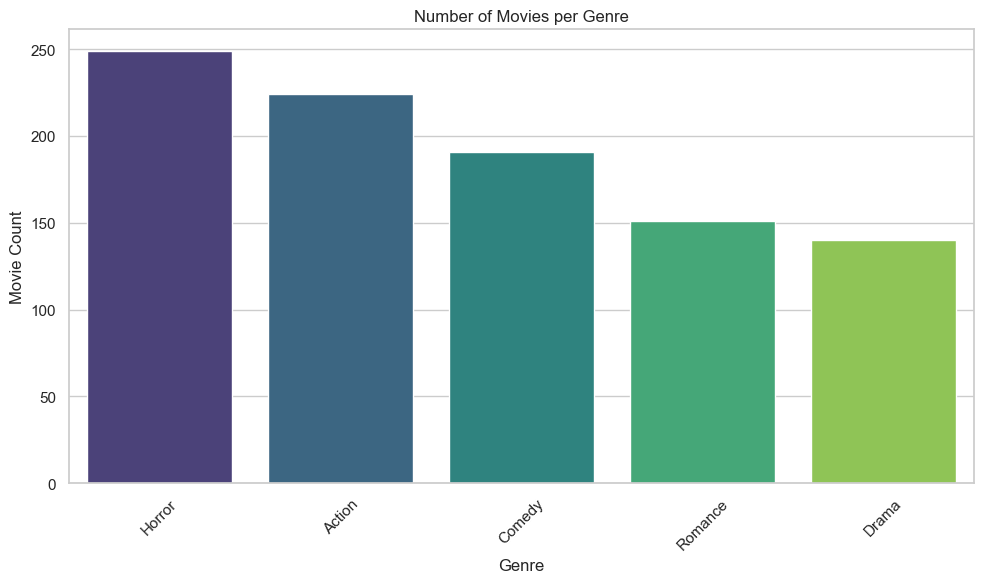

In [15]:
# Step 14: Genre Frequency Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Genre'].value_counts().index,
            y=df['Genre'].value_counts().values,
            palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

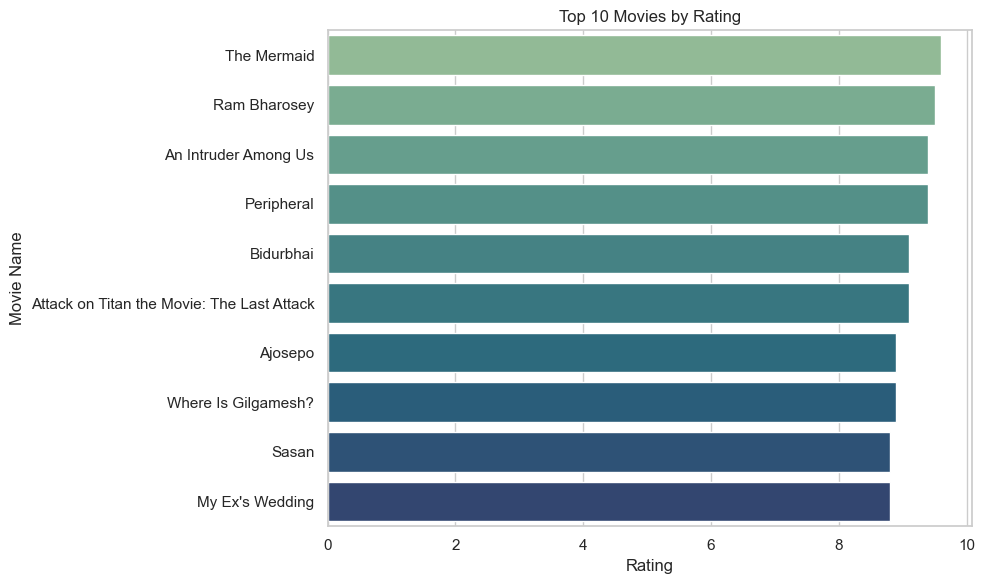

In [16]:
# Step 15: Top 10 Movies by Rating
top10 = df.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Rating', y='Movie_Name', palette='crest')
plt.title('Top 10 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.tight_layout()
plt.show()

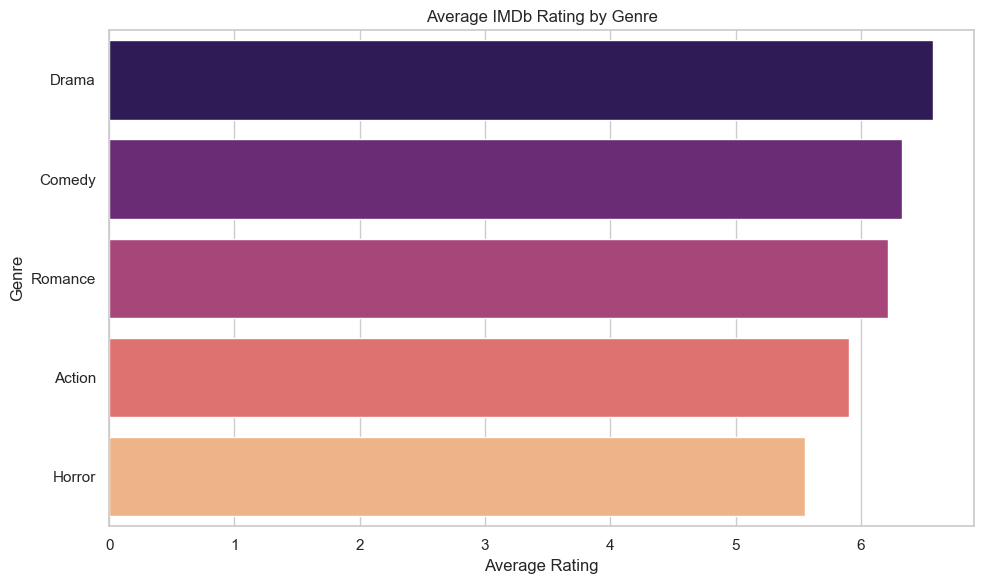

In [17]:
# Step 16: Average Rating by Genre
avg_rating_by_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette='magma')
plt.title('Average IMDb Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

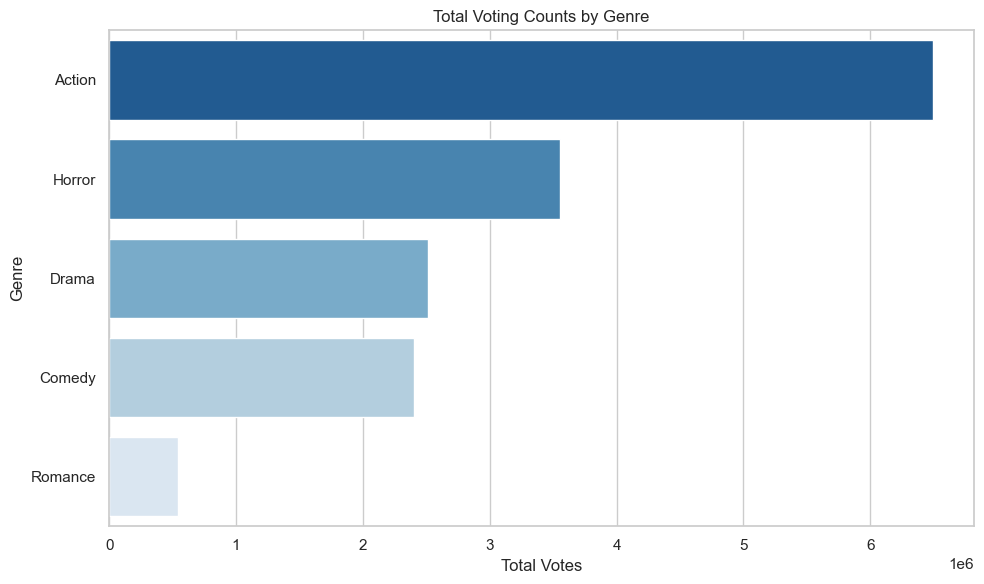

In [18]:
# Step 17: Total Voting Counts by Genre
total_votes_by_genre = df.groupby('Genre')['Voting_Counts'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_votes_by_genre.values, y=total_votes_by_genre.index, palette='Blues_r')
plt.title('Total Voting Counts by Genre')
plt.xlabel('Total Votes')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

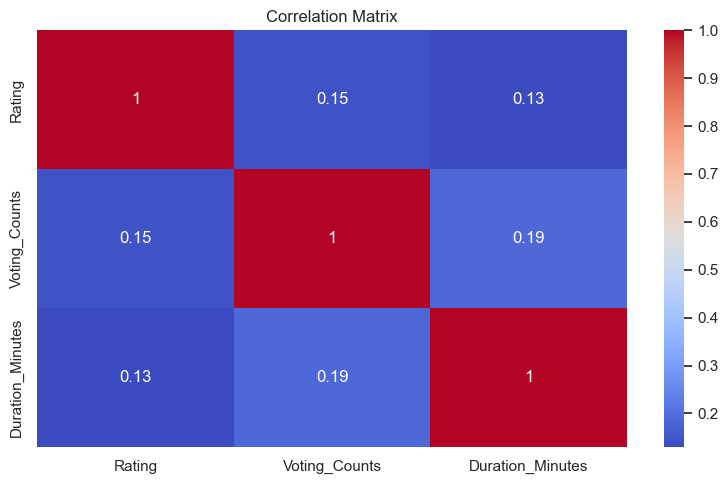

In [19]:
# Step 18: Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

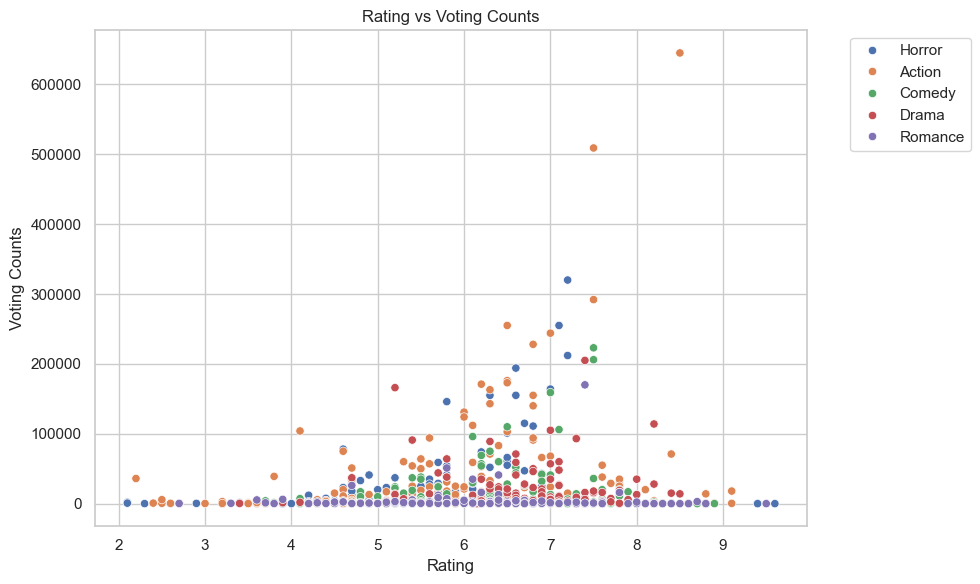

In [20]:
# Step 19: Scatter Plot - Rating vs Voting Counts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Voting_Counts', hue='Genre')
plt.title('Rating vs Voting Counts')
plt.xlabel('Rating')
plt.ylabel('Voting Counts')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
# Step 20: Duration Extremes
shortest_movies = df.nsmallest(5, 'Duration_Minutes')[['Movie_Name', 'Duration_Minutes', 'Genre']]
longest_movies = df.nlargest(5, 'Duration_Minutes')[['Movie_Name', 'Duration_Minutes', 'Genre']]

In [22]:
# Step 21: Unique Value Exploration
unique_genres = df['Genre'].unique()
unique_genre_count = df['Genre'].nunique()
unique_rating_tags = df['Rating_Tag'].unique()

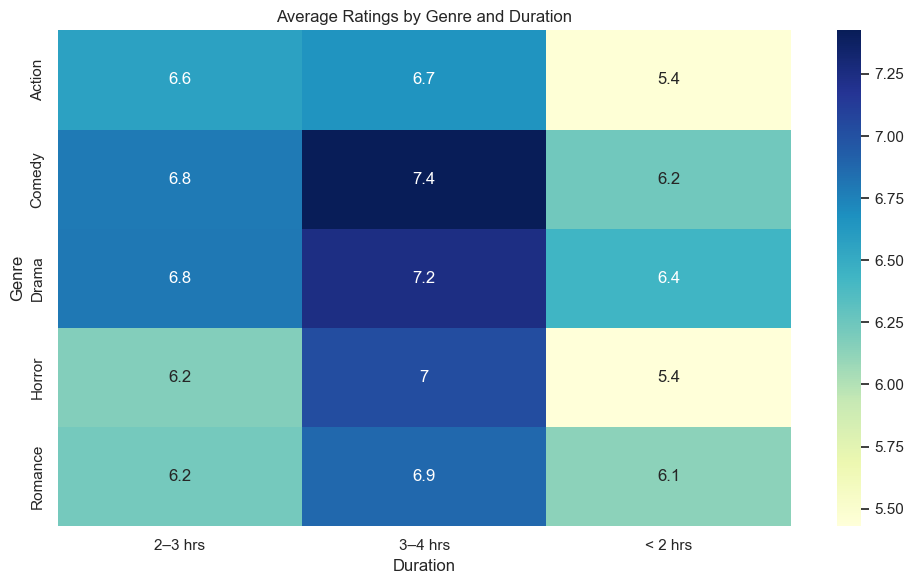

In [23]:
# Step 22: Pivot Plot - Average Ratings by Genre and Duration
if 'Duration' in df.columns:
    ratings_pivot = df.pivot_table(
        values='Rating',
        index='Genre',
        columns='Duration',
        aggfunc='mean'
    )
    plt.figure(figsize=(10, 6))
    sns.heatmap(ratings_pivot, annot=True, cmap='YlGnBu')
    plt.title('Average Ratings by Genre and Duration')
    plt.ylabel('Genre')
    plt.xlabel('Duration')
    plt.tight_layout()
    plt.show()

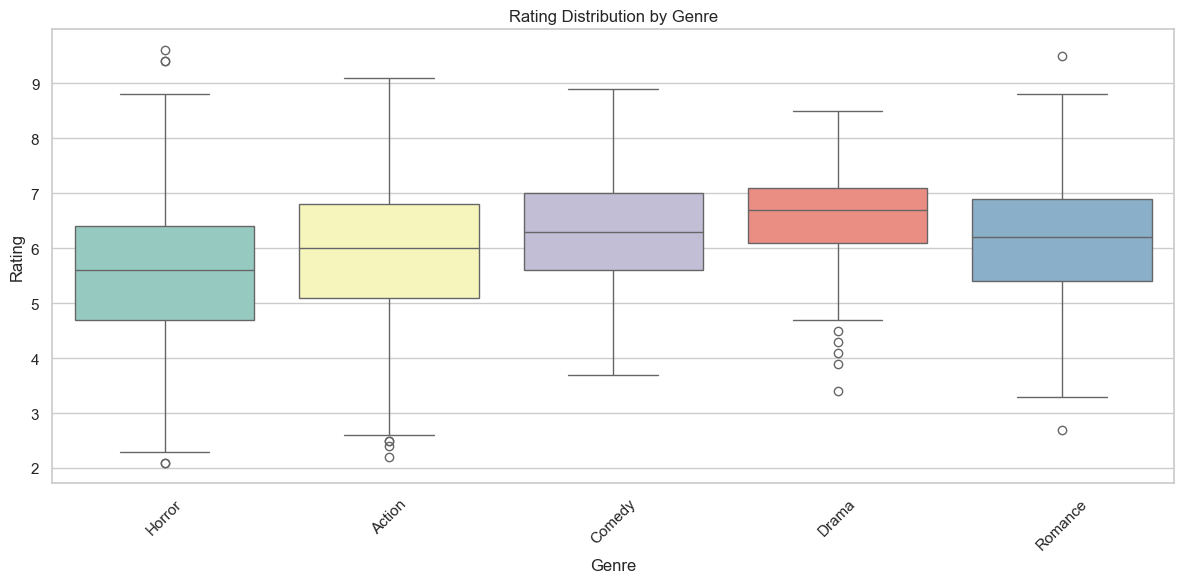

In [24]:
# Step 23: Box Plot - Rating by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Rating', palette='Set3')
plt.title('Rating Distribution by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

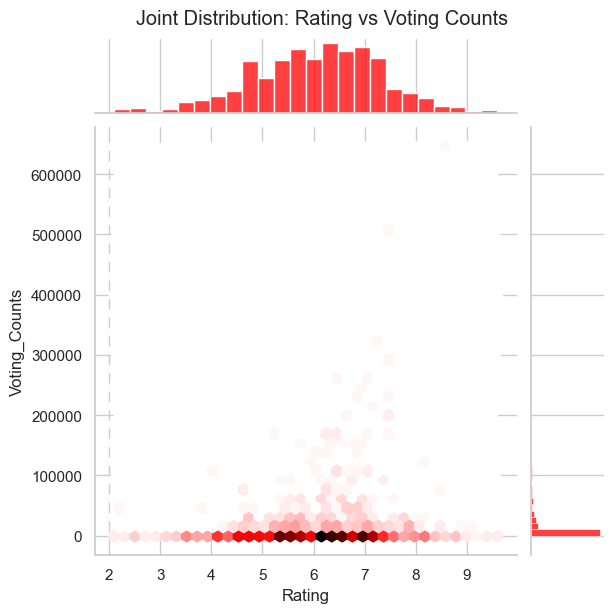

In [25]:
# Step 24: Joint Plot - Rating vs Voting Counts
sns.jointplot(data=df, x='Rating', y='Voting_Counts', kind='hex', color='red')
plt.suptitle('Joint Distribution: Rating vs Voting Counts', y=1.02)
plt.show()

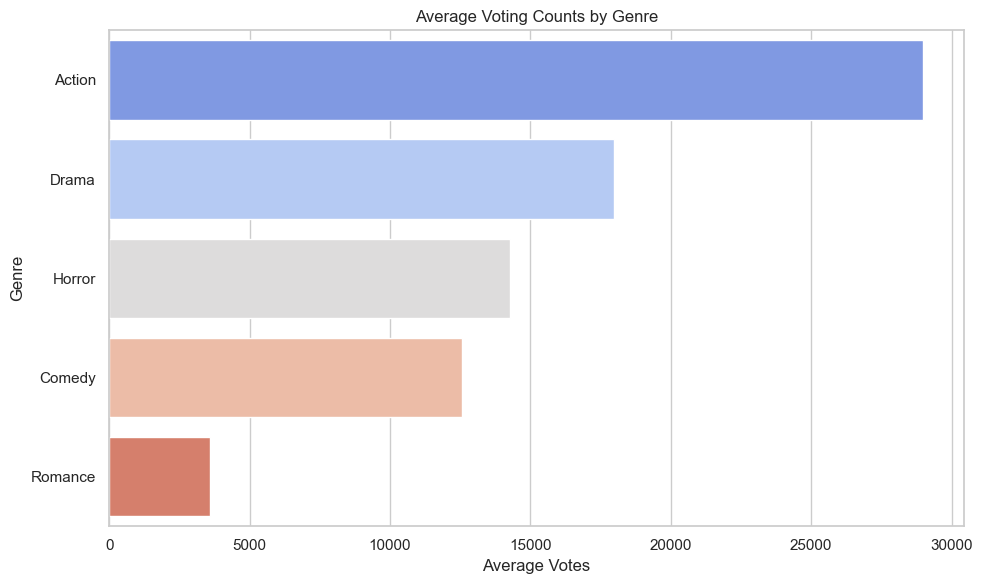

In [26]:
# Step 25: Avg Voting Counts by Genre
avg_votes_by_genre = df.groupby('Genre')['Voting_Counts'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_votes_by_genre.values, y=avg_votes_by_genre.index, palette='coolwarm')
plt.title('Average Voting Counts by Genre')
plt.xlabel('Average Votes')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

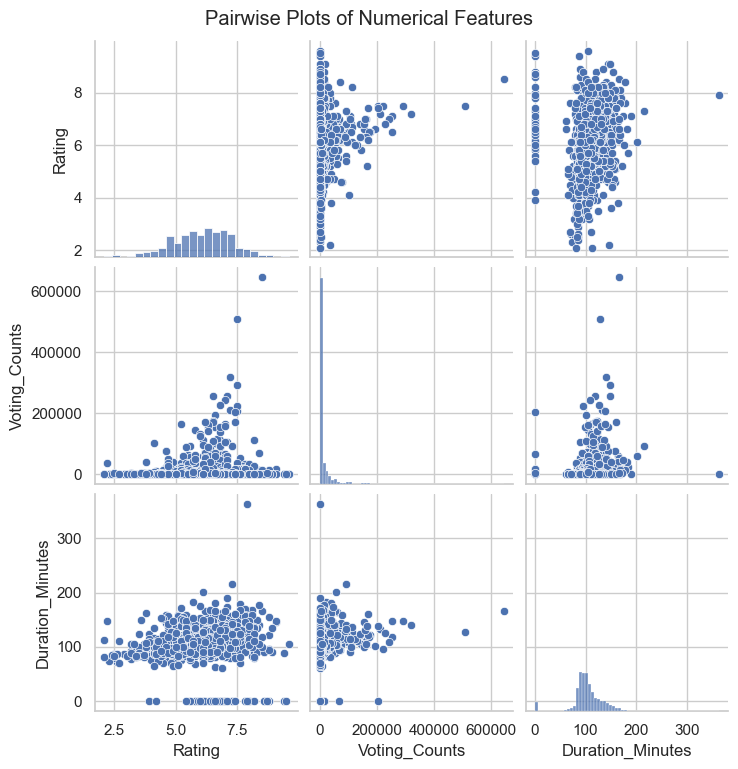

In [27]:
# Step 26: Pair Plot for Numerical Columns
sns.pairplot(df[['Rating', 'Voting_Counts', 'Duration_Minutes']])
plt.suptitle('Pairwise Plots of Numerical Features', y=1.02)
plt.show()

In [28]:
# Step 27: Drop Rating_Tag and Duration_Minutes Before Saving
df.drop(columns=['Rating_Tag', 'Duration_Minutes'], inplace=True)

In [29]:
# Step 28: Save Final Cleaned Output
output_path = os.path.join('../data/csv', 'eda_cleaned.csv')
df.to_csv(output_path, index=False)


In [30]:
# Step 29: Column Check
df.columns

Index(['Movie_Name', 'Rating', 'Voting_Counts', 'Genre', 'Duration'], dtype='object')

In [31]:
# Step 30: Null Value Check
df.isnull().sum()

Movie_Name       0
Rating           0
Voting_Counts    0
Genre            0
Duration         0
dtype: int64

In [32]:

# Step 31: Preview Final DataFrame
df.head()

,Movie_Name,Rating,Voting_Counts,Genre,Duration
0,Nosferatu,7.2,212000,Horror,2–3 hrs
1,Heretic,7.0,164000,Horror,< 2 hrs
2,The Substance,7.2,320000,Horror,2–3 hrs
3,Please Don't Feed the Children,4.9,343,Horror,< 2 hrs
4,Presence,6.1,30000,Horror,< 2 hrs
